In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
from sklearn.linear_model import LinearRegression

In [2]:
# Splitting the dataset into train and test set
dataset = pd.read_csv('FPT.csv')
dataset_size = len(dataset)

threshold = int((2/3) * dataset_size)
test = dataset.loc[0:threshold, :]
train = dataset.loc[threshold:, :]
train.to_csv('trainset_FPT.csv', index = False)
test.to_csv('testset_FPT.csv', index = False)

In [13]:
dataset_train = pd.read_csv('trainset_FPT.csv')
dataset_train = dataset_train.drop(['Ticker', 'Open Interest'], axis = 1)
dataset_train = dataset_train.rename(columns = {'Date/Time':'Date'})
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,5/21/2020 9:46,49.00,49.0,48.95,49.00,8050
1,5/21/2020 9:47,48.95,49.0,48.95,48.95,15800
2,5/21/2020 9:48,48.95,49.0,48.95,48.95,6660
3,5/21/2020 9:49,48.90,48.9,48.90,48.90,270
4,5/21/2020 9:50,49.00,49.0,49.00,49.00,31050


In [15]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32469 entries, 0 to 32468
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    32469 non-null  object 
 1   Open    32469 non-null  float64
 2   High    32469 non-null  float64
 3   Low     32469 non-null  float64
 4   Close   32469 non-null  float64
 5   Volume  32469 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.5+ MB


In [16]:
dataset_train["Close"] = pd.to_numeric(dataset_train.Close, errors = 'coerce')
dataset_train = dataset_train.dropna()

In [17]:
training_set = dataset_train.iloc[:,4:5].values # use values of the Close column
print(training_set)
print(training_set.shape)

[[49.  ]
 [48.95]
 [48.95]
 ...
 [58.2 ]
 [58.1 ]
 [58.1 ]]
(32469, 1)


In [19]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32469 entries, 0 to 32468
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    32469 non-null  object 
 1   Open    32469 non-null  float64
 2   High    32469 non-null  float64
 3   Low     32469 non-null  float64
 4   Close   32469 non-null  float64
 5   Volume  32469 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.5+ MB


In [5]:
# Normalizing dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)

In [21]:
scaled_training_set.shape

(32469, 1)

In [22]:
# Creating X_train and y_train data structures
X_train = []
y_train = []
for i in range(60, 32469):
    # timestep = 60
    X_train.append(scaled_training_set[i - 60:i, 0])
    y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [25]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis

In [26]:
print(X_train.shape)
print(y_train.shape)

(32409, 60, 1)
(32409,)


In [10]:
# Building the model by importing the Crucial Libraries and Adding Different Layers to LSTM
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense 
from keras.layers import Dropout

2022-12-14 21:19:39.525087: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [28]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
1013/1013 - 135s - loss: 0.0023 - 135s/epoch - 133ms/step
Epoch 2/20
1013/1013 - 130s - loss: 8.8575e-04 - 130s/epoch - 129ms/step
Epoch 3/20
1013/1013 - 147s - loss: 6.8745e-04 - 147s/epoch - 145ms/step
Epoch 4/20
1013/1013 - 154s - loss: 5.4923e-04 - 154s/epoch - 152ms/step
Epoch 5/20
1013/1013 - 155s - loss: 4.9997e-04 - 155s/epoch - 153ms/step
Epoch 6/20
1013/1013 - 155s - loss: 4.3375e-04 - 155s/epoch - 153ms/step
Epoch 7/20
1013/1013 - 133s - loss: 3.9343e-04 - 133s/epoch - 131ms/step
Epoch 8/20
1013/1013 - 136s - loss: 3.7696e-04 - 136s/epoch - 134ms/step
Epoch 9/20
1013/1013 - 150s - loss: 3.3346e-04 - 150s/epoch - 148ms/step
Epoch 10/20
1013/1013 - 155s - loss: 3.2618e-04 - 155s/epoch - 153ms/step
Epoch 11/20
1013/1013 - 150s - loss: 3.2434e-04 - 150s/epoch - 148ms/step
Epoch 12/20
1013/1013 - 154s - loss: 3.0071e-04 - 154s/epoch - 152ms/step
Epoch 13/20
1013/1013 - 144s - loss: 3.0794e-04 - 144s/epoch - 142ms/step
Epoch 14/20
1013/1013 - 151s - loss: 2.8845e-04 - 1

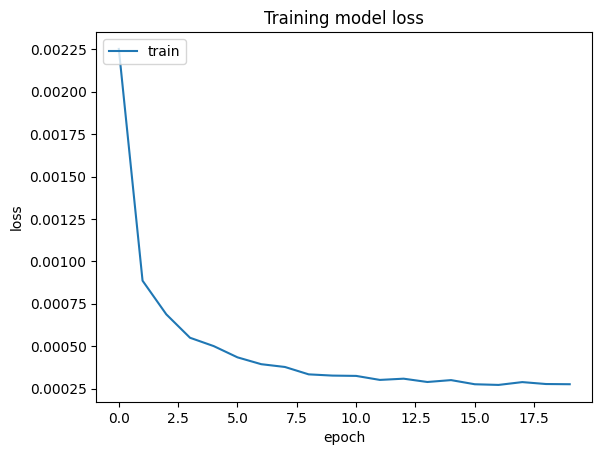

In [29]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [30]:
dataset_test = pd.read_csv('testset_FPT.csv')
dataset_test = dataset_test.drop(['Ticker', 'Open Interest'], axis = 1)
dataset_test = dataset_test.rename(columns = {'Date/Time':'Date'})
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410
1,12/25/2018 9:16,30.81,30.81,30.81,30.81,190
2,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120
3,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120
4,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500


In [31]:
dataset_test["Close"] = pd.to_numeric(dataset_test.Close, errors = 'coerce')
dataset_test = dataset_test.dropna()
dataset_test = dataset_test.iloc[:,4:5]
y_test = dataset_test.iloc[60:,0:].values

#input array for the model
inputClosing = dataset_test.iloc[:,0:].values
inputClosing_scaled = scaler.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(dataset_test)
timestep = 60
for i in range(timestep, length):
    X_test.append(inputClosing_scaled[i - timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(64878, 60, 1)

In [32]:
y_pred = model.predict(X_test)
y_pred

2028/2028 [==============================] - 94s 45ms/step


array([[-0.25424466],
       [-0.2531834 ],
       [-0.25263503],
       ...,
       [ 0.3555705 ],
       [ 0.35484493],
       [ 0.35405165]], dtype=float32)

In [33]:
predicted_price = scaler.inverse_transform(y_pred)

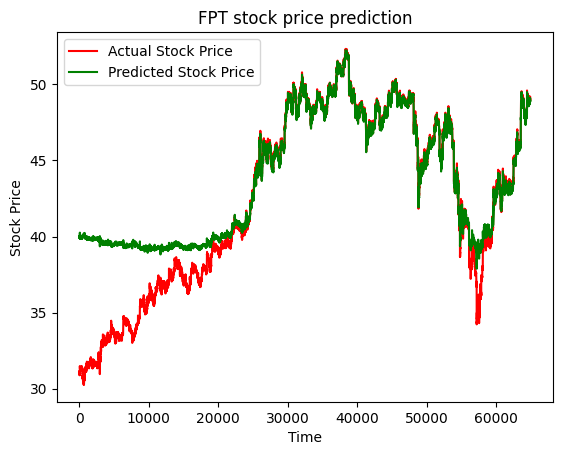

In [34]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('FPT stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()